In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data1 = pd.read_csv(r'/Users/kettin/Documents/BelajarData/PrediksiMobilMurah/Country-data.csv')
data1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
missing_columns = data1.columns[data1.isnull().any()]
print(missing_columns)

Index([], dtype='object')


In [10]:
def detect_outliers(data1):
    outliers = []  # Move the outliers list inside the function to avoid reuse issues
    threshold = 3  # Z-score threshold
    mean = np.mean(data1)
    std = np.std(data1)

    for i in data1:
        z_score = (i - mean) / std 
        if np.abs(z_score) > threshold:
            outliers.append(i)  # Append the current data point (i) instead of y
    return outliers

In [11]:
child_mort = data1['child_mort']

In [12]:
child_mort

0       90.2
1       16.6
2       27.3
3      119.0
4       10.3
       ...  
162     29.2
163     17.1
164     23.3
165     56.3
166     83.1
Name: child_mort, Length: 167, dtype: float64

In [13]:
outliers_childMort = detect_outliers(child_mort)

In [14]:
outliers_childMort

[208.0, 160.0]

In [16]:
export = data1['exports']

In [17]:
outliers_export = detect_outliers(export)

In [18]:
outliers_export

[175.0, 153.0, 200.0]

In [19]:
health = data1['health']

In [20]:
outliers_health = detect_outliers(health)

In [21]:
outliers_health

[17.9]

In [22]:
income = data1['income']

In [23]:
outliers_income = detect_outliers(income)

In [24]:
outliers_income

[80600, 75200, 91700, 125000]

In [25]:
imports = data1['imports']
outlier_imports = detect_outliers(imports)
outlier_imports

[142.0, 154.0, 174.0]

In [26]:
inflation = data1['inflation']
outlier_inflation = detect_outliers(inflation)
outlier_inflation

[104.0, 45.9]

In [27]:
lifeExpec = data1['life_expec']
outlier_lifeExpec = detect_outliers(lifeExpec)
outlier_lifeExpec

[32.1]

In [28]:
total_fer = data1['total_fer']
outlier_total_fer = detect_outliers(total_fer)
outlier_total_fer

[7.49]

In [30]:
gdpp = data1['gdpp']
outlier_gdpp = detect_outliers(gdpp)
outlier_gdpp

[105000, 87800, 70300, 74600]

VISUALIZATION

In [34]:
country_inflation = data1.groupby('country')['inflation'].sum().nlargest(10)

In [36]:
country_inflation = data1.groupby('country')['inflation'].mean().nlargest(10)
color_scale = px.colors.qualitative.Plotly

fig = px.bar(
    country_inflation,
    x=country_inflation.index,
    y=country_inflation.values,
    color=country_inflation.index,
    labels={'x': 'Name Of Country', 'y': 'Inflation'},
    text_auto=True,
    title='Top 10 Inflation',
    color_discrete_sequence=color_scale
)

fig.show()

In [37]:
country_childMort = data1.groupby('country')['child_mort'].sum().nlargest(10)

In [38]:
country_childMort = data1.groupby('country')['child_mort'].mean().nlargest(10)
color_scale = px.colors.qualitative.Plotly

fig = px.bar(
    country_childMort,
    x=country_childMort.index,
    y=country_childMort.values,
    color=country_childMort.index,
    labels={'x': 'Name Of Country', 'y': 'Child Mortality Rate'},
    text_auto=True,
    title='Top 10 Child Moratality Rate',
    color_discrete_sequence=color_scale
)

fig.show()

In [39]:
country_fertility = data1.groupby('country')['total_fer'].sum().nlargest(10)

In [40]:
country_fertility = data1.groupby('country')['total_fer'].mean().nlargest(10)
color_scale = px.colors.qualitative.Plotly

fig = px.bar(
    country_fertility,
    x=country_fertility.index,
    y=country_fertility.values,
    color=country_fertility.index,
    labels={'x': 'Name Of Country', 'y': 'Fertility'},
    text_auto=True,
    title='Top 10 Fertility',
    color_discrete_sequence=color_scale
)

fig.show()

In [41]:
country_fertility = data1.groupby('country')['total_fer'].mean().nlargest(20)
color_scale = px.colors.qualitative.Plotly

fig = px.bar(
    country_fertility,
    x=country_fertility.index,
    y=country_fertility.values,
    color=country_fertility.index,
    labels={'x': 'Name Of Country', 'y': 'Fertility'},
    text_auto=True,
    title='Top 20 Fertility',
    color_discrete_sequence=color_scale
)

fig.show()

In [42]:
country_fertility = data1.groupby('country')['total_fer'].mean().nsmallest(20)
color_scale = px.colors.qualitative.Plotly

fig = px.bar(
    country_fertility,
    x=country_fertility.index,
    y=country_fertility.values,
    color=country_fertility.index,
    labels={'x': 'Name Of Country', 'y': 'Fertility'},
    text_auto=True,
    title='Top 20 Fertility',
    color_discrete_sequence=color_scale
)

fig.show()

In [43]:
country_inflation_indonesia = country_inflation[country_inflation.index == 'Indonesia']

In [44]:
country_inflation_indonesia

Series([], Name: inflation, dtype: float64)

In [45]:
country_inflation_nigeria = country_inflation[country_inflation.index == 'Nigeria']

In [46]:
country_inflation_nigeria

country
Nigeria    104.0
Name: inflation, dtype: float64

PRE-PROCESSING

In [48]:
indonesia = data1.loc[data1["country"] == "Zimbabwe"]
print(indonesia)

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


In [51]:
scaler = StandardScaler()

In [53]:
data1[['child_mort_T',	'exports_T', 'health_T',	'imports_T',	'income_T',	'inflation_T',	'life_expec_T',	'total_fer_T',	'gdpp_T']] = scaler.fit_transform(data1[['child_mort',	'exports',	'health',	'imports',	'income',	'inflation',	'life_expec',	'total_fer',	'gdpp']])

In [54]:
data1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_T,exports_T,health_T,imports_T,income_T,inflation_T,life_expec_T,total_fer_T,gdpp_T
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [62]:

def optimise_k_means (data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans. inertia_)
    #Generate the elbow plot
    fig =plt.subplots (figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

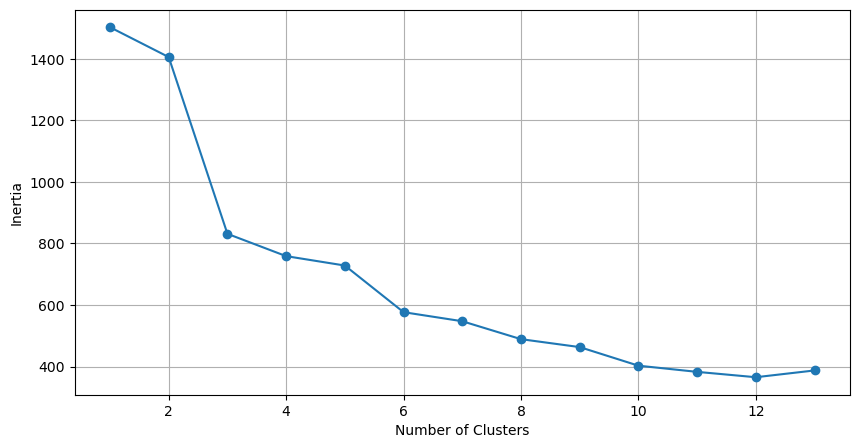

In [64]:
optimise_k_means(data1[['child_mort_T',	'exports_T', 'health_T',	'imports_T',	'income_T',	'inflation_T',	'life_expec_T',	'total_fer_T',	'gdpp_T']], 14)

In [73]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1[['child_mort_T',	'exports_T', 'health_T',	'imports_T',	'income_T',	'inflation_T',	'life_expec_T',	'total_fer_T',	'gdpp_T']])

KMeans(n_clusters=3)

In [70]:
data1['kmeans_3'] = kmeans.labels_

In [79]:
data1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_T,exports_T,health_T,imports_T,income_T,inflation_T,life_expec_T,total_fer_T,gdpp_T,kmeans_3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,2


In [78]:
data1 = data1.drop('kmeans_4', axis=1)

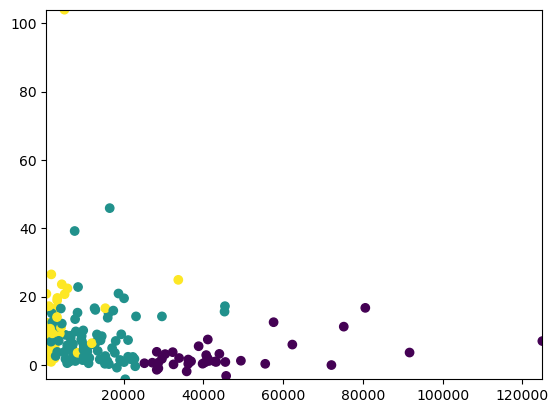

In [74]:
plt.scatter(x=data1['income'], y=data1['inflation'], c=data1['kmeans_3'])
plt.xlim(609.000000, 125000.000000)
plt.ylim(-4.210000,104.000000)
plt.show()

In [1]:
print('wle')

wle
